In [1]:
library(phyloseq)
library(ggplot2)
library(dplyr)
library(tibble)
library(vegan)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: permute

Loading required package: lattice

This is vegan 2.6-4



In [2]:
#2. Import dummy data and edit accordingly
#2.1 Import otu table
asv_sheet <- read.csv("asv_sheet.csv")
colnames(asv_sheet)[1] <- "Row_ID"
asv_sheet <- column_to_rownames(asv_sheet, "Row_ID")

In [3]:
#2.2 Import taxa table
tax_sheet_raw <- read.csv("tax_sheet.csv", row.names=1)
str(tax_sheet_raw)

'data.frame':	358 obs. of  13 variables:
 $ query       : chr  "Taxa_00004" "Taxa_00007" "Taxa_00008" "Taxa_00009" ...
 $ superkingdom: chr  "Bacteria" "Archaea" "Archaea" "Bacteria" ...
 $ kingdom     : chr  "" "" "" "" ...
 $ phylum      : chr  "Proteobacteria" "Euryarchaeota" "Euryarchaeota" "" ...
 $ class       : chr  "Gammaproteobacteria" "" "" "" ...
 $ subclass    : chr  "" "" "" "" ...
 $ order       : chr  "Methylococcales" "" "" "" ...
 $ suborder    : chr  "" "" "" "" ...
 $ family      : chr  "" "" "" "" ...
 $ tribe       : chr  "" "" "" "" ...
 $ genus       : chr  "" "" "" "" ...
 $ species     : chr  "" "" "" "" ...
 $ seq         : chr  "TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGTAGGCGGTTCGTTAAGTCAGATGTGAAAGCCCTGGGCTCAACCTGGGAACGGCATTTGAAACT"| __truncated__ "TACCGGCAGCTCAAGTGGTCGTCGCTTTTATTGGGCCTAAAACGTCCGTAGCCTGTTTGGTAAATCTGTGGGTAAATCAACCAGCTTAACTGGTTGAATTCTGCAGAGACT"| __truncated__ "TACCGGCAGCTCAAGTGGTCGTCGCTTTTATTGGGCCTAAAACGTCCGTAGCCTGTTTGGTAAATCTGTGGGTAAATC

In [4]:
tax_sheet <- subset(tax_sheet_raw, select = c("superkingdom", "phylum", "class", "order","family", "genus", "species"))
colnames(tax_sheet) <- c("Domain", "Phylum", "Class", "Order", "Family", "Genus", "Species")
str(tax_sheet)

'data.frame':	358 obs. of  7 variables:
 $ Domain : chr  "Bacteria" "Archaea" "Archaea" "Bacteria" ...
 $ Phylum : chr  "Proteobacteria" "Euryarchaeota" "Euryarchaeota" "" ...
 $ Class  : chr  "Gammaproteobacteria" "" "" "" ...
 $ Order  : chr  "Methylococcales" "" "" "" ...
 $ Family : chr  "" "" "" "" ...
 $ Genus  : chr  "" "" "" "" ...
 $ Species: chr  "" "" "" "" ...


In [5]:
sample_sheet <- read.csv("sample_sheet.csv")  %>%
                tibble::column_to_rownames(var = "Row_ID")
SAMPLE_DATA <- sample_data(sample_sheet)

In [6]:
xtabs(~Site + Method, data =sample_sheet)

      Method
Site   destruction w_beads wo_beads
  pond           6       6        6
  sea            6       6        6

In [7]:
xtabs(~Site + Method +  sample_nc, data =sample_sheet)

, , sample_nc = field_nc

      Method
Site   destruction w_beads wo_beads
  pond           1       1        1
  sea            1       1        1

, , sample_nc = sample

      Method
Site   destruction w_beads wo_beads
  pond           5       5        5
  sea            5       5        5


In [8]:
#set taxa are rows to FALSE to avoid downstream errors
OTU = otu_table(as.matrix(asv_sheet), taxa_are_rows = FALSE)
head(OTU)

,Taxa00001,Taxa00002,Taxa00003,Taxa00004,Taxa00005,Taxa00006,Taxa00007,Taxa00008,Taxa00009,Taxa00011,⋯,Taxa00663,Taxa00664,Taxa00665,Taxa00668,Taxa00676,Taxa00679,Taxa00680,Taxa00681,Taxa00684,Taxa00685
R001,0,1335,838,622,0,524,587,145,0,393,⋯,0,0,0,0,0,0,0,0,0,0
R002,0,869,511,434,0,345,273,113,12,290,⋯,0,0,0,0,0,0,0,0,0,0
R003,0,1773,1075,910,0,794,570,227,19,517,⋯,0,0,0,0,0,7,67,0,7,0
R004,0,1149,716,556,0,502,442,127,10,384,⋯,0,0,0,0,0,0,25,0,0,0
R005,0,2453,1433,1199,0,1063,1310,453,15,710,⋯,20,0,0,0,0,17,0,27,0,0
R006,0,0,0,0,0,0,0,0,428,0,⋯,0,0,0,0,0,0,0,0,0,0


In [9]:
TAX = tax_table(as.matrix(tax_sheet))
head(TAX)

,Domain,Phylum,Class,Order,Family,Genus,Species
Taxa00001,Bacteria,Proteobacteria,Gammaproteobacteria,Methylococcales,,,
Taxa00002,Archaea,Euryarchaeota,,,,,
Taxa00003,Archaea,Euryarchaeota,,,,,
Taxa00004,Bacteria,,,,,,
Taxa00005,Bacteria,Proteobacteria,Betaproteobacteria,Nitrosomonadales,Methylophilaceae,,
Taxa00006,Bacteria,Proteobacteria,Alphaproteobacteria,Pelagibacterales,Pelagibacteraceae,Candidatus Pelagibacter,


In [10]:
#Sanity check if have formatted the table correctly and everything aligns before creating our phyloseq object
all(taxa_names(TAX) == taxa_names(OTU))

[1] TRUE

In [11]:
physeq <- phyloseq(OTU, TAX, SAMPLE_DATA)

physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 358 taxa and 36 samples ]
sample_data() Sample Data:       [ 36 samples by 14 sample variables ]
tax_table()   Taxonomy Table:    [ 358 taxa by 7 taxonomic ranks ]

In [12]:
#check sample_data
sample_data(physeq)  %>% head()

,Sample_ID,Sample_Name,Sample_Name2,I7_Index_ID,index,I5_Index_ID,index2,Sample_Project,Description,Site,Method,sample_nc,water_vol,replicate
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
R001,RMR-121-S577,ProSTD40000-01,R001,U718,GAGACACA,D507,CAGGACGT,DNAextraction_test,MS1,sea,wo_beads,sample,100,S001
R002,RMR-121-S578,ProSTD40000-02,R002,U718,GAGACACA,D508,GTACTGAC,DNAextraction_test,MS2,sea,wo_beads,sample,100,S002
R003,RMR-121-S579,ProSTD40000-03,R003,U719,AACCGGAA,D501,TATAGCCT,DNAextraction_test,MS3,sea,wo_beads,sample,100,S003
R004,RMR-121-S580,ProSTD40000-04,R004,U719,AACCGGAA,D502,ATAGAGGC,DNAextraction_test,MS4,sea,wo_beads,sample,100,S004
R005,RMR-121-S581,ProSTD40000-05,R005,U719,AACCGGAA,D503,CCTATCCT,DNAextraction_test,MS5,sea,wo_beads,sample,100,S005
R006,RMR-121-S582,ProSTD40000-06,R006,U719,AACCGGAA,D504,GGCTCTGA,DNAextraction_test,MS0,sea,wo_beads,field_nc,100,S006


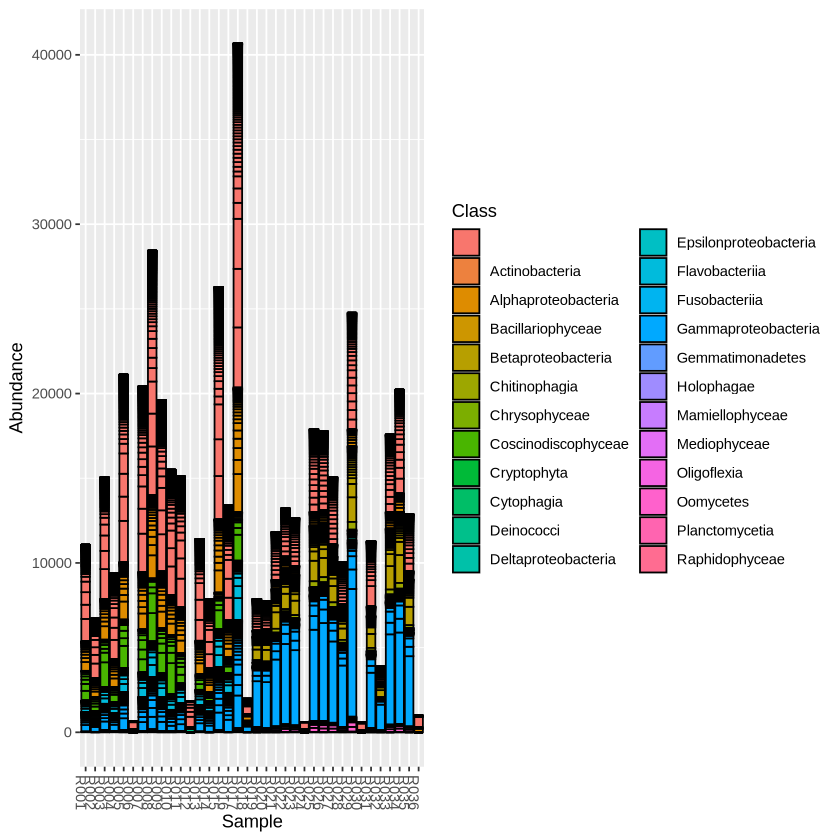

In [13]:
#4. Make some graphs 
#4.1 Plot bar
plot_bar(physeq, fill = "Class")

In [14]:
#Some ugly code to visualise see sampling depth
(sampling_depth <- phyloseq::sample_sums(physeq) %>% data.frame() %>% `colnames<-`(c("reads")) %>% arrange(reads) %>% data.frame()) %>% t()

,R030,R024,R006,R036,R012,R018,R032,R002,R020,R014,⋯,R026,R025,R009,R034,R007,R005,R029,R015,R008,R017
reads,583,606,661,1011,1854,1975,3877,6720,7759,7864,⋯,17773,17885,19611,20223,20424,21116,24764,26285,28430,40664


Warning message in vegan::rarecurve(as.matrix(data.frame(otu_table(physeq)))):
“most observed count data have counts 1, but smallest count is 2”


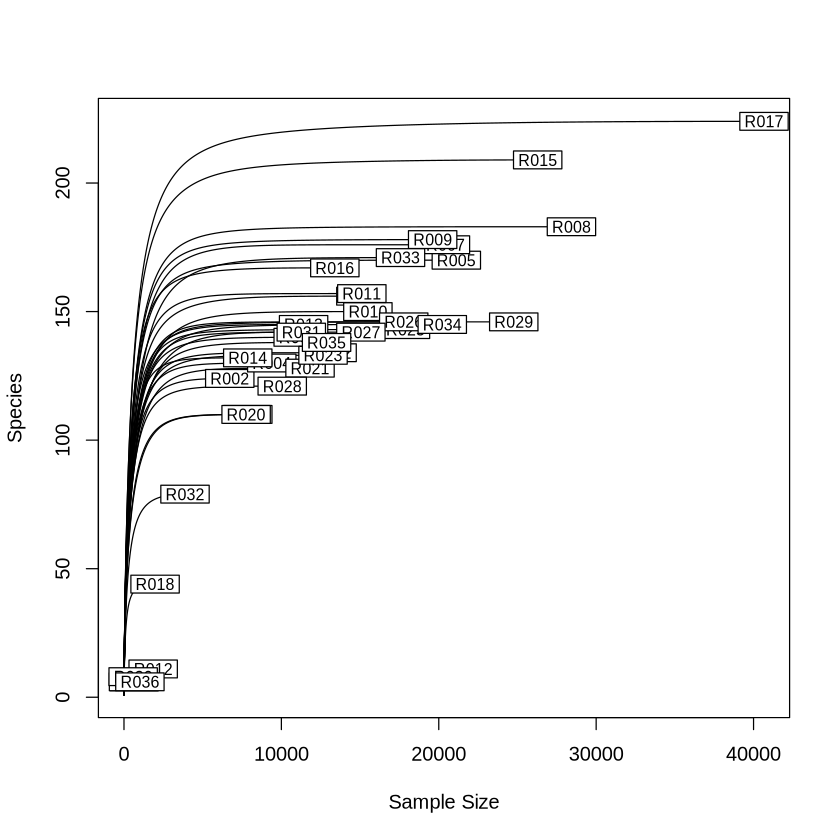

In [15]:
#Rarecurve appears to have some issues with phyloseq objects
#the as.matrix data.frame work around appears to work
vegan::rarecurve(as.matrix(data.frame(otu_table(physeq))))
#there is a warning messages
#Warning message needs further investigation

In [16]:
#GGRARE
#installation of package to run ggrare function to colour by type
#https://rdrr.io/github/gauravsk/ranacapa/f/README.md
#This is a huge package foe eDNA analysis start to end!! 
#The package can be run interactively however, we going function
#comment out this part and move the library files to the top of the file
if (!requireNamespace("devtools", quietly = TRUE))
      install.packages('devtools')
library(devtools)
devtools::install_github("gauravsk/ranacapa")
library(ranacapa)

Loading required package: usethis


Attaching package: ‘devtools’


The following object is masked from ‘package:permute’:

    check


Skipping install of 'ranacapa' from a github remote, the SHA1 (58c0cabb) has not changed since last install.
  Use `force = TRUE` to force installation



rarefying sample R001
rarefying sample R002
rarefying sample R003
rarefying sample R004
rarefying sample R005
rarefying sample R006
rarefying sample R007
rarefying sample R008
rarefying sample R009
rarefying sample R010
rarefying sample R011
rarefying sample R012
rarefying sample R013
rarefying sample R014
rarefying sample R015
rarefying sample R016
rarefying sample R017
rarefying sample R018
rarefying sample R019
rarefying sample R020
rarefying sample R021
rarefying sample R022
rarefying sample R023
rarefying sample R024
rarefying sample R025
rarefying sample R026
rarefying sample R027
rarefying sample R028
rarefying sample R029
rarefying sample R030
rarefying sample R031
rarefying sample R032
rarefying sample R033
rarefying sample R034
rarefying sample R035
rarefying sample R036


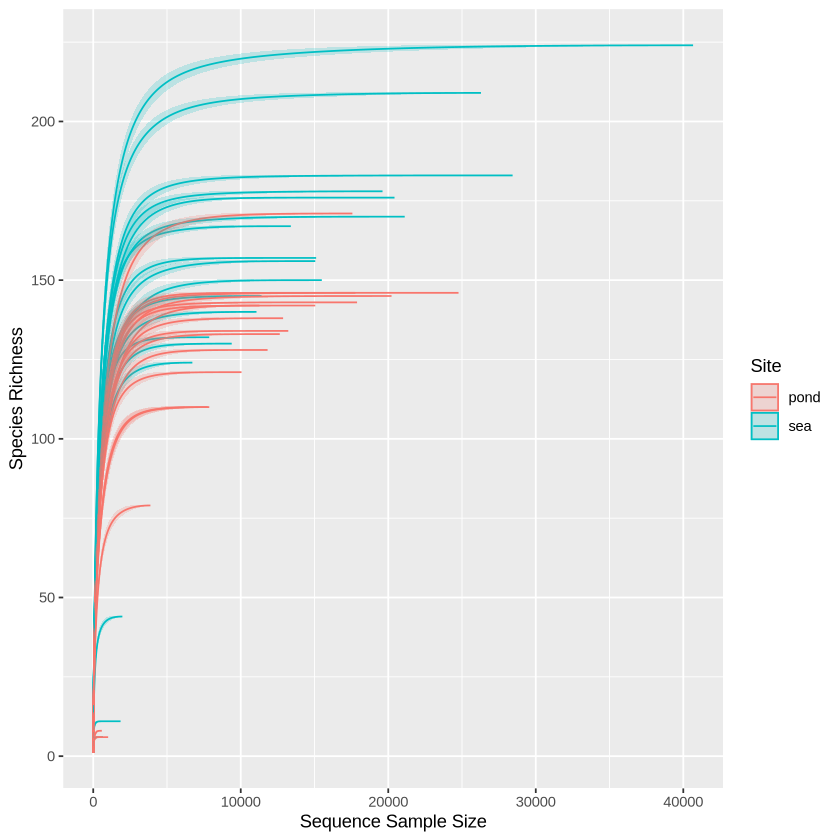

In [17]:
#This suppresses multiple warning
#Same warning as rarecurve function
#Warning... most observed count data have counts 1, but smallest count is 2” ...
suppressWarnings( 
    
ranacapa::ggrare(physeq, color = "Site")

)

rarefying sample R001
rarefying sample R002
rarefying sample R003
rarefying sample R004
rarefying sample R005
rarefying sample R006
rarefying sample R007
rarefying sample R008
rarefying sample R009
rarefying sample R010
rarefying sample R011
rarefying sample R012
rarefying sample R013
rarefying sample R014
rarefying sample R015
rarefying sample R016
rarefying sample R017
rarefying sample R018
rarefying sample R019
rarefying sample R020
rarefying sample R021
rarefying sample R022
rarefying sample R023
rarefying sample R024
rarefying sample R025
rarefying sample R026
rarefying sample R027
rarefying sample R028
rarefying sample R029
rarefying sample R030
rarefying sample R031
rarefying sample R032
rarefying sample R033
rarefying sample R034
rarefying sample R035
rarefying sample R036


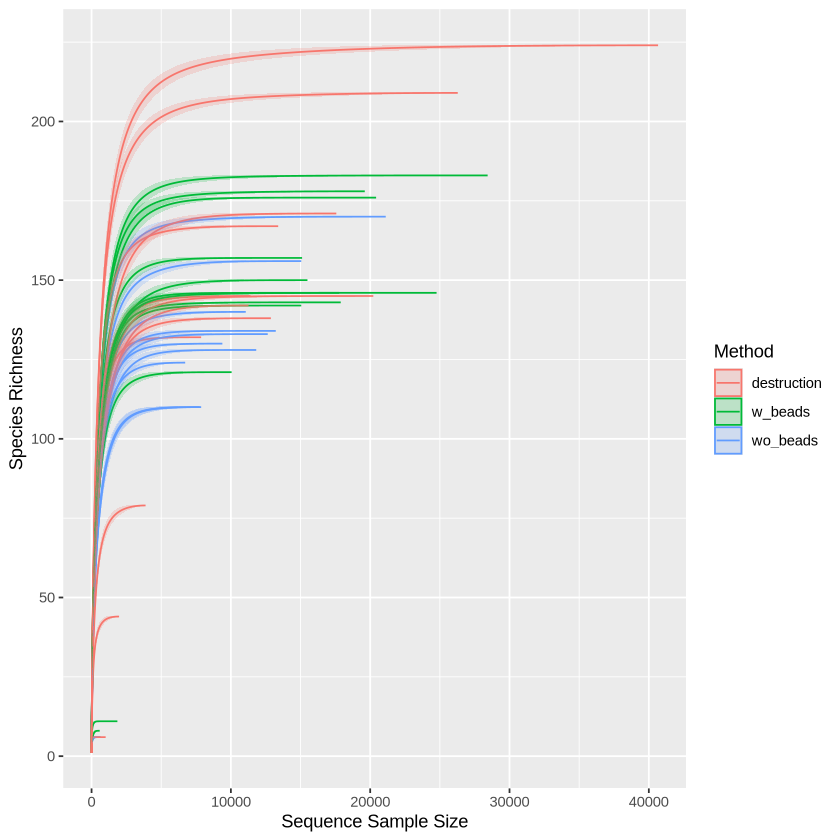

In [18]:
suppressWarnings( 
    
ranacapa::ggrare(physeq, color = "Method")

)

rarefying sample R001
rarefying sample R002
rarefying sample R003
rarefying sample R004
rarefying sample R005
rarefying sample R006
rarefying sample R007
rarefying sample R008
rarefying sample R009
rarefying sample R010
rarefying sample R011
rarefying sample R012
rarefying sample R013
rarefying sample R014
rarefying sample R015
rarefying sample R016
rarefying sample R017
rarefying sample R018
rarefying sample R019
rarefying sample R020
rarefying sample R021
rarefying sample R022
rarefying sample R023
rarefying sample R024
rarefying sample R025
rarefying sample R026
rarefying sample R027
rarefying sample R028
rarefying sample R029
rarefying sample R030
rarefying sample R031
rarefying sample R032
rarefying sample R033
rarefying sample R034
rarefying sample R035
rarefying sample R036


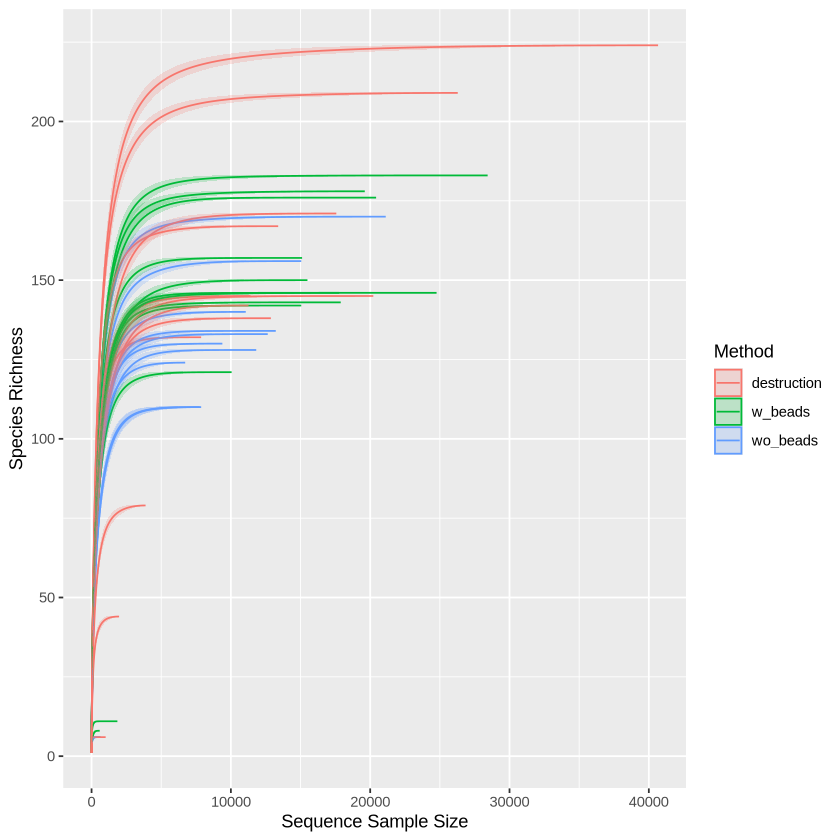

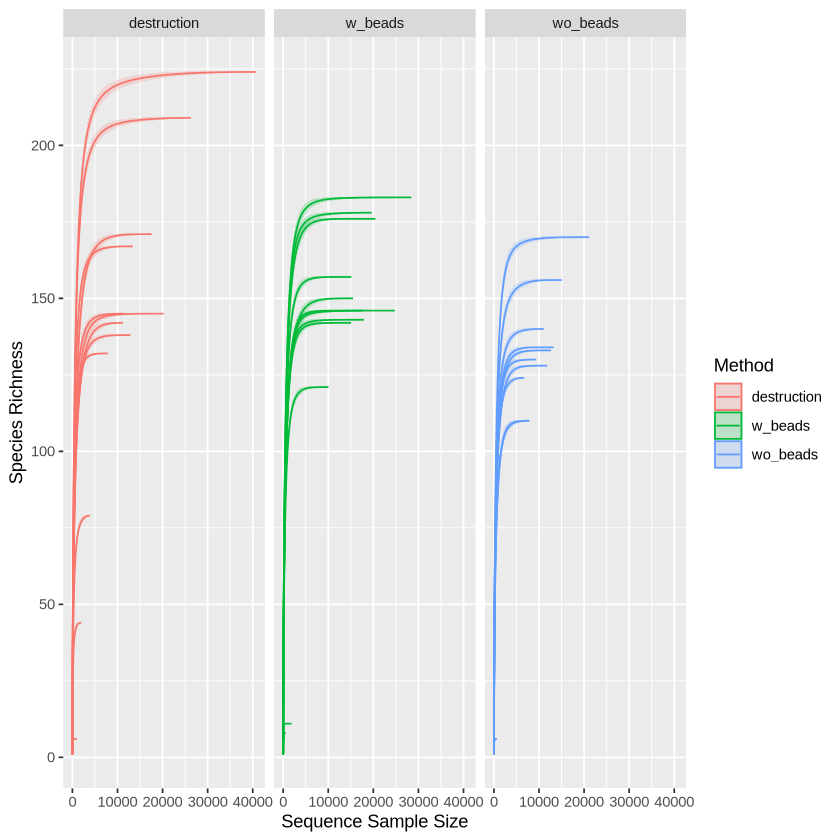

In [19]:
#Can also use face_wrap
suppressWarnings( 
    
ranacapa::ggrare(physeq, color = "Method") + facet_wrap(~git Method)

)